1. Load the dataset and understand the transaction-related attributes.
2. Identify relevant features that may help distinguish:
Fraudulent transactions
Legitimate transactions
3. Build a classification model that can decide whether a transaction is fraud o
not fraud.
4. Train the model using historical transaction data.
5. Predict outcomes for unseen transactions.
6. Evaluate the model using appropriate classification metrics.
7. Analyze the following:
o How many fraudulent transactions were correctly detected?
o How many legitimate transactions were incorrectly flagged as fraud?
8. Compare model behavior with a single rule-based classifier:
o Which model is more stable?
Which model is less sensitive to noise?
9. Interpret results in business terms:
o Is it better to block a genuine transaction or allow a fraudulent one?
o Which tvpe of error is more costlv?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
X=df.drop('Class',axis=1)
y=df['Class']

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
)


In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = le.fit_transform(X[col])


In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(
    n_estimators=10,
    criterion="entropy"
)
classifier.fit(X_train, y_train)



RandomForestClassifier(criterion='entropy', n_estimators=10)

In [33]:
y_pred =classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], shape=(56962,))

In [35]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy Score {accuracy:.2f}")

Accuracy Score 1.00


In [30]:
from sklearn.metrics import classification_report
print("Classification Report\n",classification_report(y_test,y_pred))

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.76      0.84        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



<Axes: >

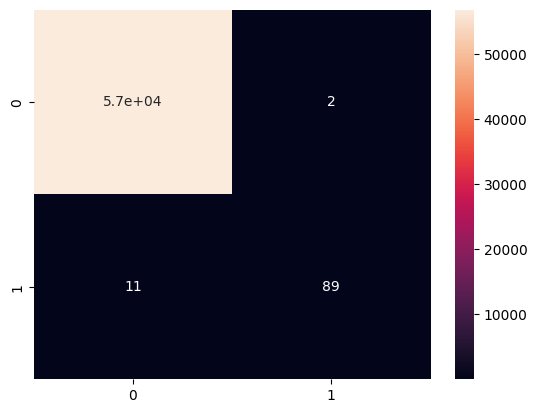

In [36]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)